In [3]:
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score


/var/folders/pw/9fnphybj4kq8t6wt3h592_9r0000gn/T/ipykernel_1099/4079963633.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [24]:
def multiclass_eval(model, prompt, df):
    y_true = df['y_true']
    y_true = df['y_pred']
    cm = metrics.confusion_matrix(df['y_true'], df['y_pred'])
    cm
    plt.figure(figsize=(3,3))
    sns.heatmap(cm, annot=True, fmt="0.3f", linewidths=.5, square = True, cbar = 'False')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    # Display the plot
    plt.show()
    target_names = ['negative', 'neutral', 'positive']
    print(metrics.classification_report(df['y_true'], df['y_pred'], target_names=target_names, output_dict=False))
    classification_report = metrics.classification_report(df['y_true'], df['y_pred'], target_names=target_names, output_dict=True)
    
    
    
    

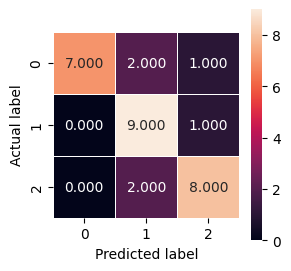

              precision    recall  f1-score   support

    negative       1.00      0.70      0.82        10
     neutral       0.69      0.90      0.78        10
    positive       0.80      0.80      0.80        10

    accuracy                           0.80        30
   macro avg       0.83      0.80      0.80        30
weighted avg       0.83      0.80      0.80        30



In [25]:
data = {'y_true' : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,0,0,0,0,0,0,0,0,0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], 'y_pred' : [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,0,0,0,0,0,0,0,0, 1, 1, 0, 0, -1, -1, -1, -1, -1, -1, -1]}
df = pd.DataFrame(data)
df
multiclass_eval('model', 'prompt', df)
